In [167]:
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats as smf
smf('retina')
%matplotlib inline
import numpy as np

In [78]:
offense = pd.read_csv('offense_codes.csv')
print(offense.shape)
offense.head()

(299, 8)


,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [79]:
crime = pd.read_csv('crime.csv')
print(crime.shape)
crime.head()

(526100, 19)


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [80]:
crime.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [81]:
offense.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'OFFENSE_TYPE_ID',
       'OFFENSE_TYPE_NAME', 'OFFENSE_CATEGORY_ID', 'OFFENSE_CATEGORY_NAME',
       'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [123]:
df = pd.merge(crime, offense)
print(cr.shape)
df.head()

(526100, 21)


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,...,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,201872599,201872599521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,NaN,1/30/2018 10:14:00 PM,12900 BLOCK E ANDREWS DR,...,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
2,201866465,201866465521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 1:30:00 PM,1/28/2018 1:30:00 PM,1/28/2018 4:26:00 PM,14000 BLK E MAXWELL PL,...,1714526.0,-104.824755,39.793246,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
3,201872704,201872704521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 11:08:00 PM,NaN,1/31/2018 8:43:00 AM,1700 BLOCK E BRUCE RANDOLPH AVE,...,1703764.0,-104.966880,39.764431,2,211,cole,1,0,Unlawful discharge of a weapon,All Other Crimes
4,2018255494,2018255494521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,4/17/2018 2:29:00 AM,NaN,4/17/2018 2:48:00 AM,900 BLOCK N NEWTON ST,...,1691766.0,-105.037222,39.731791,1,122,villa-park,1,0,Unlawful discharge of a weapon,All Other Crimes


In [137]:
df.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'OFFENSE_TYPE_NAME',
       'OFFENSE_CATEGORY_NAME'],
      dtype='object')

In [198]:
dff = df.copy()

In [199]:
dff = dff[['OFFENSE_ID',
        'FIRST_OCCURRENCE_DATE',
       'OFFENSE_TYPE_NAME',
       'OFFENSE_CATEGORY_NAME']]

In [200]:
dff.head()

,OFFENSE_ID,FIRST_OCCURRENCE_DATE,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978521300,6/15/2016 11:31:00 PM,Unlawful discharge of a weapon,All Other Crimes
1,201872599521300,1/30/2018 10:14:00 PM,Unlawful discharge of a weapon,All Other Crimes
2,201866465521300,1/28/2018 1:30:00 PM,Unlawful discharge of a weapon,All Other Crimes
3,201872704521300,1/30/2018 11:08:00 PM,Unlawful discharge of a weapon,All Other Crimes
4,2018255494521300,4/17/2018 2:29:00 AM,Unlawful discharge of a weapon,All Other Crimes


In [206]:
dff['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(dff['FIRST_OCCURRENCE_DATE'])

In [164]:
crimekind = pd.DataFrame(dff['OFFENSE_CATEGORY_NAME'].value_counts()).reset_index()

In [165]:
crimekind.columns = ['Crime', 'Counts']

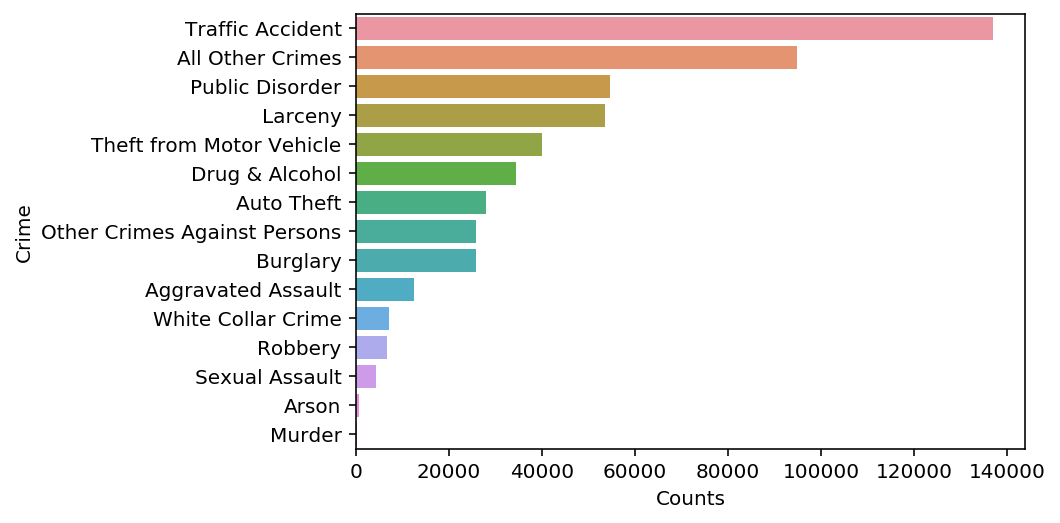

In [168]:
sns.barplot(data=crimekind, x='Counts', y='Crime')

In [174]:
allother = pd.DataFrame(dff.loc[dff['OFFENSE_CATEGORY_NAME']=='All Other Crimes', 'OFFENSE_TYPE_NAME'].value_counts())

In [189]:
allother = allother.reset_index()

In [190]:
allother.columns=['Crime', 'Counts']

In [209]:
allother.head(30)

,Crime,Counts
0,Traffic offense - other,33668
1,Criminal trespassing,16483
2,Public order offense - other,8223
3,Habitual traffic offender,3993
4,Vehicular eluding - no chase,3968
5,Giving false information to police,3934
6,Violation of a restraining order,3287
7,Violation of a court order,2922
8,Unlawful discharge of a weapon,2864
9,Obstructing police,2075


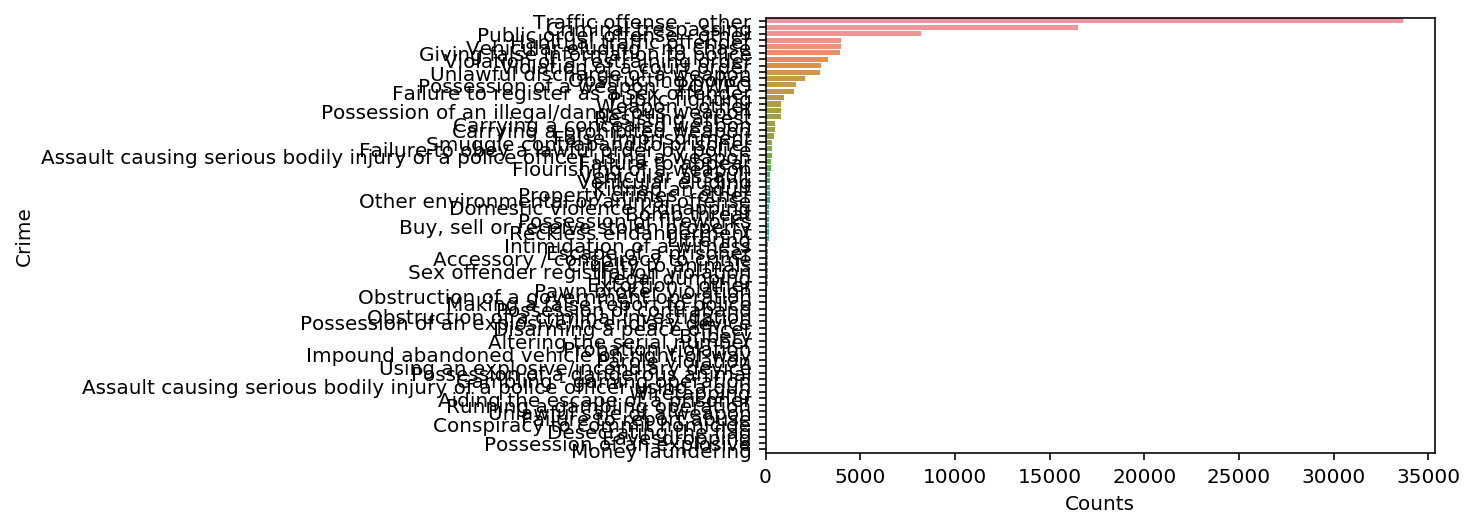

In [191]:
sns.barplot(data=allother, x='Counts', y='Crime')

In [136]:
df.loc[df['IS_TRAFFIC']==1,'OFFENSE_CATEGORY_NAME'].value_counts()

Traffic Accident    136967
All Other Crimes       254
Murder                  28
Name: OFFENSE_CATEGORY_NAME, dtype: int64

In [27]:
df.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'OFFENSE_TYPE_NAME',
       'OFFENSE_CATEGORY_NAME'],
      dtype='object')

In [29]:
df.head()

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
2016376978521300,2016376978,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
201872599521300,201872599,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,NaN,1/30/2018 10:14:00 PM,12900 BLOCK E ANDREWS DR,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
201866465521300,201866465,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 1:30:00 PM,1/28/2018 1:30:00 PM,1/28/2018 4:26:00 PM,14000 BLK E MAXWELL PL,3189748.0,1714526.0,-104.824755,39.793246,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
201872704521300,201872704,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 11:08:00 PM,NaN,1/31/2018 8:43:00 AM,1700 BLOCK E BRUCE RANDOLPH AVE,3149872.0,1703764.0,-104.966880,39.764431,2,211,cole,1,0,Unlawful discharge of a weapon,All Other Crimes
2018255494521300,2018255494,5213,0,weapon-unlawful-discharge-of,all-other-crimes,4/17/2018 2:29:00 AM,NaN,4/17/2018 2:48:00 AM,900 BLOCK N NEWTON ST,3130158.0,1691766.0,-105.037222,39.731791,1,122,villa-park,1,0,Unlawful discharge of a weapon,All Other Crimes


In [87]:
df['OFFENSE_CODE'].value_counts()

5441    95634
5499    37877
5401    37282
2999    33270
2399    30776
        ...  
2309        1
5303        1
5207        1
5302        1
6300        1
Name: OFFENSE_CODE, Length: 156, dtype: int64

In [114]:
list((df['OFFENSE_CODE'].value_counts()==1)[-5:].keys())

[2309, 5303, 5207, 5302, 6300]

In [141]:
df.loc[df['OFFENSE_CODE']==5499]

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
67824,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,...,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0,Traffic offense - other,All Other Crimes
67825,201871171,201871171549900,5499,0,traf-other,all-other-crimes,1/30/2018 11:27:00 AM,NaN,1/30/2018 12:00:00 PM,3900 BLK N PEORIA WAY,...,1706918.0,-104.847720,39.772489,5,512,stapleton,1,0,Traffic offense - other,All Other Crimes
67826,201871362,201871362549900,5499,0,traf-other,all-other-crimes,1/30/2018 12:30:00 PM,NaN,1/30/2018 1:09:00 PM,3200 BLOCK E 48TH AVE,...,1710827.0,-104.949562,39.783741,2,212,elyria-swansea,1,0,Traffic offense - other,All Other Crimes
67827,201871234,201871234549900,5499,0,traf-other,all-other-crimes,1/30/2018 11:50:00 AM,NaN,1/30/2018 12:51:00 PM,1600 BLOCK S BROADWAY ST,...,1675694.0,-104.987353,39.687462,3,313,platt-park,1,0,Traffic offense - other,All Other Crimes
67828,201871888,201871888549900,5499,0,traf-other,all-other-crimes,1/30/2018 4:06:00 PM,NaN,1/30/2018 4:54:00 PM,E 17TH AVE / N YORK ST,...,1696063.0,-104.959783,39.743257,6,622,city-park-west,1,0,Traffic offense - other,All Other Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524866,2019673934,2019673934549901,5499,1,vehicular-eluding,all-other-crimes,10/21/2019 1:50:00 PM,10/21/2019 1:55:00 PM,10/21/2019 5:27:00 PM,603 N SANTA FE DR,...,1689716.0,-104.999056,39.726007,1,123,lincoln-park,1,0,Vehicular eluding,All Other Crimes
524867,2019647197,2019647197549901,5499,1,vehicular-eluding,all-other-crimes,10/9/2019 2:15:00 PM,10/9/2019 2:20:00 PM,10/9/2019 2:32:00 PM,W COLFAX AVE / I25 HWYNB,...,1694949.0,-105.013966,39.740435,1,123,lincoln-park,1,0,Vehicular eluding,All Other Crimes
524868,2019694909,2019694909549901,5499,1,vehicular-eluding,all-other-crimes,10/31/2019 3:39:00 PM,NaN,10/31/2019 4:54:00 PM,NaN,...,1681622.0,-105.023862,39.703890,4,412,athmar-park,1,0,Vehicular eluding,All Other Crimes
524869,2019662830,2019662830549901,5499,1,vehicular-eluding,all-other-crimes,10/16/2019 2:00:00 PM,NaN,10/16/2019 4:26:00 PM,W 39TH AVE / N LIPAN ST,...,1705927.0,-105.001762,39.770522,1,112,sunnyside,1,0,Vehicular eluding,All Other Crimes


In [115]:
df.loc[df['OFFENSE_CODE']==2309]

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
20166008171230900,20166008171,2309,0,theft-from-yards,larceny,8/17/2016 9:00:00 PM,8/17/2016 9:05:00 PM,8/18/2016 3:17:00 PM,9526 E 4TH AVE,3175276.0,1688273.0,-104.876895,39.721462,3,321,lowry-field,1,0,Theft from a yard,Larceny


In [116]:
df.loc[df['OFFENSE_CODE']==5303]

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
2015649351530300,2015649351,5303,0,riot,public-disorder,11/5/2015 6:43:00 PM,NaN,11/5/2015 8:48:00 PM,E COLFAX AVE / N BROADWAY ST,3144156.0,1694853.0,-104.987391,39.740059,6,611,civic-center,1,0,Engaging in a riot,Public Disorder


In [117]:
df.loc[df['OFFENSE_CODE']==5207]

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
2017403456520700,2017403456,5207,0,explosives-posses,all-other-crimes,6/20/2017 1:50:00 PM,NaN,6/20/2017 4:11:00 PM,1230 S RALEIGH ST,3128819.0,1678095.0,-105.042228,39.69428,4,421,mar-lee,1,0,Possession of an explosive,All Other Crimes


In [118]:
df.loc[df['OFFENSE_CODE']==5302]

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
2018629362530200,2018629362,5302,0,riot-incite,public-disorder,9/13/2018 7:11:00 PM,NaN,9/13/2018 8:07:00 PM,2770 W EVANS AVE,3134572.0,1672041.0,-105.021898,39.677579,4,422,college-view-south-platte,1,0,Inciting a riot,Public Disorder


In [119]:
df.loc[df['OFFENSE_CODE']==6300]

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
2018298482630000,2018298482,6300,0,money-laundering,all-other-crimes,5/4/2018 11:30:00 AM,NaN,5/4/2018 4:26:00 PM,3300 BLOCK W 38TH AVE,3131905.0,1705460.0,-105.03076,39.769359,1,113,west-highland,1,0,Money laundering,All Other Crimes


In [122]:
PD.head()

,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
OFFENSE_ID,,,,,,,,,,,,,,,,,,,,
20188004580131600,20188004580,1316,0,threats-to-injure,public-disorder,1/30/2018 2:30:00 PM,NaN,1/30/2018 3:50:00 PM,8900 PENA BLVD,3231979.0,1738721.0,-104.673694,39.858704,7,759,dia,1,0,Threatening to injure,Public Disorder
201871024131600,201871024,1316,0,threats-to-injure,public-disorder,1/29/2018 12:45:00 PM,1/29/2018 1:00:00 PM,1/30/2018 10:34:00 AM,NaN,3138693.0,1710481.0,-105.006515,39.783043,1,111,sunnyside,1,0,Threatening to injure,Public Disorder
201870819131600,201870819,1316,0,threats-to-injure,public-disorder,1/30/2018 9:00:00 AM,NaN,1/30/2018 10:37:00 AM,7600 BLK E COLFAX AVE,3168986.0,1695157.0,-104.899093,39.740476,2,223,east-colfax,1,0,Threatening to injure,Public Disorder
2017427377131600,2017427377,1316,0,threats-to-injure,public-disorder,6/29/2017 6:45:00 PM,6/29/2017 8:23:00 PM,6/30/2017 12:30:00 AM,103 S OGDEN ST,3147419.0,1685570.0,-104.975979,39.714524,3,311,speer,1,0,Threatening to injure,Public Disorder
201875633131600,201875633,1316,0,threats-to-injure,public-disorder,2/1/2018 2:50:00 AM,NaN,2/1/2018 3:03:00 AM,1962 E COLFAX AVE,3150780.0,1694801.0,-104.963839,39.739811,6,622,cheesman-park,1,0,Threatening to injure,Public Disorder


In [121]:
PD = df.loc[df['OFFENSE_CATEGORY_NAME']=='Public Disorder']
PD['OFFENSE_TYPE_NAME'].value_counts()

Criminal mischief to a motor vehicle          15958
Criminal mischief - other                     14114
Disturbing the peace                           8928
Threatening to injure                          5821
Criminal mischief - graffiti                   3198
Curfew                                         1579
Public  peace - other                          1569
Harassment                                     1237
Engaging in prostitution                       1000
Harassment - DV                                 527
Harassment - sexual in nature                   362
Harassment by stalking - domestic violence      244
Pimping for prostitution                         33
Loitering                                         8
Aiding the act of prostitution                    5
Engaging in  a riot                               1
Inciting a riot                                   1
Name: OFFENSE_TYPE_NAME, dtype: int64

In [110]:
list((df['OFFENSE_TYPE_ID'].value_counts()==1)[-7:].keys())

['riot-incite',
 'theft-of-cable-services',
 'theft-from-yards',
 'riot',
 'money-laundering',
 'explosives-posses',
 'altering-vin-number']

In [33]:
df['OFFENSE_CATEGORY_NAME'].value_counts()

Traffic Accident                136967
All Other Crimes                 94817
Public Disorder                  54585
Larceny                          53502
Theft from Motor Vehicle         40021
Drug & Alcohol                   34402
Auto Theft                       28050
Other Crimes Against Persons     25911
Burglary                         25890
Aggravated Assault               12561
White Collar Crime                7206
Robbery                           6835
Sexual Assault                    4376
Arson                              655
Murder                             322
Name: OFFENSE_CATEGORY_NAME, dtype: int64